In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)


In [16]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Download and Unzip State by State dataset

In [7]:
import requests
from bs4 import BeautifulSoup
import os
import zipfile
# Download the additional ZIP file
additional_zip_url = 'https://www.epa.gov/system/files/other-files/2024-09/allstateghgdata90-22_v082924.zip'
additional_zip_path = 'epa_data/allstateghgdata.zip'

os.makedirs('epa_data', exist_ok=True)

print(f"Downloading {additional_zip_url}...")
response = requests.get(additional_zip_url)
with open(additional_zip_path, 'wb') as file:
    file.write(response.content)

print("File downloaded.")

# Unzip the file
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('epa_data')

print("File unzipped.")
os.rename('epa_data/allstateghgdata90-22_v082924.xlsx', 'epa_data/allstateghgdata.xlsx')


File downloaded.
File unzipped.


In [12]:
# Assuming the Excel file is named 'allstateghgdata.xlsx' and is located in the 'epa_data' directory
excel_file_path = 'epa_data/allstateghgdata.xlsx'

# Read the Excel file with multiple sheets
un_sector = pd.read_excel(excel_file_path, sheet_name=1)
econ_sector = pd.read_excel(excel_file_path, sheet_name=2)





In [13]:
un_sector.head()

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,carbon_pool,fuel1,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002264,0.002704,0.003249,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
econ_sector.head()

,econ_sector,econ_subsector,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.021973,0.020588,0.003934,0.004712,0.003303,0.004553,0.003750,0.004008,0.004094,0.004039
1,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.405321,0.340277,0.299993,0.389063,0.319967,0.376200,0.386687,0.345480,0.352673,0.347956
2,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,1.488775,1.333660,1.203423,1.228332,0.916704,1.130034,1.070653,1.032991,1.052542,1.038465
3,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,0.582441,0.598184,0.449419,0.566802,0.490579,0.400804,0.437455,0.392028,0.398905,0.393570
4,Agriculture,Carbon Dioxide from Fossil Fuel Combustion,Agriculture,Fossil Fuel Combustion,Agriculture,Mobile Non-Highway Farm Equipment,NaN,NaN,NaN,NaN,...,4.009574,4.711127,4.518359,3.914111,3.825177,3.540273,3.216634,3.076691,3.134478,3.092556


In [17]:
un_sector.columns
econ_sector.columns

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'sub_category_4', 'sub_category_5', 'carbon_pool',
       'fuel1', 'fuel2', 'geo_ref', 'units', 'ghg_category', 'ghg', 'gwp',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021',
       'Y2022'],
      dtype='object')

Index(['econ_sector', 'econ_subsector', 'sector', 'subsector', 'category',
       'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4',
       'sub_category_5', 'carbon_pool', 'fuel1', 'fuel2', 'geo_ref', 'units',
       'ghg', 'ghg_category', 'gwp', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [26]:
from pprint import pprint

un_sector['sector'].unique()
un_sector['subsector'].unique()
pprint(un_sector.groupby('sector')['subsector'].unique())

array(['Agriculture', 'Energy', 'Energy-Excluded',
       'Industrial Processes and Product Use',
       'Land Use, Land-Use Change and Forestry', 'Waste'], dtype=object)

array(['CO2 Emissions from Liming, Urea Application and Other Carbon-Containing Fertilizers',
       'Direct and indirect N2O emissions from agricultural soils',
       'Enteric Fermentation', 'Field Burning of Agricultural Residues',
       'Manure Management', 'Rice Cultivation', 'Fossil Fuel Combustion',
       'Fugitives', 'Incineration of Waste',
       'Non-Energy Uses of Fossil Fuels', 'Memo Items',
       'Chemical Industry', 'Electronics Industry', 'Metal Industry',
       'Mineral Industry', 'Other', 'Other product manufacture and use',
       'Product uses as substitutes for ODS', 'Cropland', 'Forest Land',
       'Grassland', 'Settlements', 'Wetlands',
       'Biological Treatment of Solid Waste', 'Solid Waste Disposal',
       'Wastewater Treatment and Discharge'], dtype=object)

sector
Agriculture                               [CO2 Emissions from Liming, Urea Application a...
Energy                                    [Fossil Fuel Combustion, Fugitives, Incinerati...
Energy-Excluded                                                                [Memo Items]
Industrial Processes and Product Use      [Chemical Industry, Electronics Industry, Meta...
Land Use, Land-Use Change and Forestry    [Cropland, Forest Land, Grassland, Settlements...
Waste                                     [Biological Treatment of Solid Waste, Solid Wa...
Name: subsector, dtype: object


In [33]:
length = len(un_sector)
for i in range(1, 6):
    na_sum = un_sector[f'sub_category_{i}'].isna().sum()
    if na_sum == length:
        un_sector = un_sector.drop(columns=[f'sub_category_{i}'])

In [34]:
un_sector.columns

Index(['sector', 'subsector', 'category', 'sub_category_1', 'sub_category_2',
       'sub_category_3', 'carbon_pool', 'fuel1', 'fuel2', 'geo_ref', 'units',
       'ghg_category', 'ghg', 'gwp', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022'],
      dtype='object')

In [36]:
un_sector['fuel1'].isna().sum()
un_sector['fuel2'].isna().sum()

25067

27569

In [38]:
un_sector.head()

,sector,subsector,category,sub_category_1,sub_category_2,sub_category_3,carbon_pool,fuel1,fuel2,geo_ref,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AK,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AL,...,0.005047,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AR,...,0.002264,0.002704,0.003249,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AS,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Agriculture,"CO2 Emissions from Liming, Urea Application an...",Liming,Dolomite,NaN,NaN,NaN,NaN,NaN,AZ,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
un_sector['ghg_category'].unique()

array(['CO2', 'N2O', 'CH4', 'HFC', 'PFC', 'NF3', 'SF6'], dtype=object)

In [69]:
# un_sector.groupby(['sector', 'geo_ref'])['ghg_category'].nunique()
time = ['Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022']
sector_sum = un_sector.groupby(['sector'])[time].sum()
state_sum = un_sector.groupby(['sector', 'geo_ref', 'ghg_category'])[time].sum()
sector_sum
state_sum

,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
sector,,,,,,,,,,,,,,,,,,,,,
Agriculture,551.144889,543.176284,543.242299,564.394935,567.486160,573.566724,581.444035,566.114701,577.338244,573.417897,...,611.154223,613.361124,614.842859,608.866851,617.358643,642.407327,620.058204,599.652527,604.782764,593.383143
Energy,5381.001398,5339.104242,5435.772533,5526.847469,5606.631802,5655.800040,5832.525372,5901.597177,5962.352593,6014.208916,...,5695.755562,5745.135573,5579.953590,5441.221020,5400.434250,5569.974908,5422.418558,4862.808074,5173.461910,5200.908217
Energy-Excluded,342.521878,354.179176,356.857386,340.936578,346.952993,353.520944,359.182566,359.524302,344.335897,339.019287,...,432.369080,443.498132,445.425024,450.378279,450.132114,461.318630,447.678675,365.948918,383.898577,404.514714
Industrial Processes and Product Use,368.804242,351.098809,357.513775,357.111210,369.768738,399.195483,412.221854,421.270672,429.308343,427.472063,...,365.649673,374.586653,369.645975,361.603746,362.742036,367.161897,371.886678,367.877109,381.550654,383.184902
"Land Use, Land-Use Change and Forestry",-976.694753,-988.981065,-1007.385254,-991.346533,-1005.221534,-980.231241,-1011.174581,-985.194812,-996.334677,-968.475624,...,-886.612351,-923.660388,-820.192451,-916.798482,-926.002261,-915.499704,-863.576003,-904.394726,-910.553723,-854.238577
Waste,235.946956,239.295372,239.872490,238.085054,238.734867,233.557916,230.116860,219.980890,209.972215,203.517833,...,172.827118,172.753380,171.714855,168.387287,170.478322,173.193003,175.754999,171.677482,169.159358,166.869407


Y1990     Y1991     Y1992     Y1993  \
sector      geo_ref ghg_category                                           
Agriculture AK      CH4           0.019795  0.018513  0.019165  0.019730   
                    CO2           0.004000  0.003872  0.003793  0.004121   
                    N2O           0.006266  0.005964  0.006034  0.006112   
            AL      CH4           3.746019  3.525716  3.579089  3.624341   
                    CO2           0.095663  0.099563  0.089143  0.077443   
...                                    ...       ...       ...       ...   
Waste       WI      N2O           0.281799  0.287451  0.294166  0.298054   
            WV      CH4           0.799055  1.038419  1.041080  0.942918   
                    N2O           0.086248  0.086584  0.087598  0.088021   
            WY      CH4           0.210481  0.210482  0.204270  0.194066   
                    N2O           0.027033  0.027539  0.027978  0.028356   

                                     Y1994     Y1995     Y1996     Y1997  \
sector      geo_ref ghg_category                                           
Agriculture AK      CH4           0.022504  0.023485  0.025519  0.029216   
                    CO2           0.004090  0.003863  0.003410  0.003410   
                    N2O           0.006867  0.007162  0.007728  0.008709   
            AL      CH4           3.718780  3.821266  3.728194  3.442763   
                    CO2           0.004226  0.107697  0.074044  0.103496   
...                                    ...       ...       ...       ...   
Waste       WI      N2O           0.306608  0.307981  0.312648  0.312955   
            WV      CH4           1.046032  1.059861  1.094112  0.976877   
                    N2O           0.089340  0.088566  0.088744  0.087418   
            WY      CH4           0.191413  0.181261  0.179724  0.166936   
                    N2O           0.029271  0.029313  0.029651  0.029426   

                                     Y1998     Y1999  ...     Y2013     Y2014  \
sector      geo_ref ghg_category                      ...                       
Agriculture AK      CH4           0.029822  0.028848  ...  0.029582  0.026823   
                    CO2           0.003446  0.003450  ...  0.003859  0.003793   
                    N2O           0.008862  0.008536  ...  0.010089  0.008923   
            AL      CH4           3.387458  3.254936  ...  2.819866  2.784928   
                    CO2           0.093895  0.107912  ...  0.063378  0.006710   
...                                    ...       ...  ...       ...       ...   
Waste       WI      N2O           0.318405  0.327171  ...  0.361199  0.354047   
            WV      CH4           0.937048  0.875093  ...  1.068750  1.020270   
                    N2O           0.088144  0.089641  ...  0.090656  0.088001   
            WY      CH4           0.153205  0.141860  ...  0.225337  0.230900   
                    N2O           0.029795  0.030416  ...  0.035915  0.037729   

                                     Y2015     Y2016     Y2017     Y2018  \
sector      geo_ref ghg_category                                           
Agriculture AK      CH4           0.028259  0.028197  0.030788  0.034716   
                    CO2           0.003760  0.003807  0.003812  0.003757   
                    N2O           0.009036  0.008908  0.009320  0.010135   
            AL      CH4           2.687434  2.703021  2.798435  2.853935   
                    CO2           0.006852  0.007309  0.007480  0.007437   
...                                    ...       ...       ...       ...   
Waste       WI      N2O           0.344894  0.344633  0.351644  0.359423   
            WV      CH4           0.940760  0.927518  0.922525  0.959128   
                    N2O           0.084719  0.085306  0.086582  0.088377   
            WY      CH4           0.237627  0.242764  0.225571  0.223363   
                    N2O           0.039614  0.042259  0.042546  0.042467   

                

In [ ]:
sector_sum_diff = sector_sum.pct_change(axis='columns') * 100
sector_sum_diff


,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
sector,,,,,,,,,,,,,,,,,,,,,
Agriculture,NaN,-1.445828,0.012153,3.893776,0.547706,1.071491,1.373391,-2.636425,1.982556,-0.679038,...,6.334501,0.361104,0.241576,-0.971957,1.394688,4.057396,-3.478964,-3.290929,0.855535,-1.884912
Energy,NaN,-0.778613,1.810571,1.675474,1.443578,0.876966,3.124674,1.184252,1.029474,0.869729,...,2.736804,0.866962,-2.875162,-2.486267,-0.749589,3.139389,-2.649138,-10.320311,6.388363,0.530521
Energy-Excluded,NaN,3.403373,0.756174,-4.461392,1.764673,1.893038,1.601496,0.095143,-4.224584,-1.544019,...,4.774165,2.573971,0.434476,1.112029,-0.054658,2.485163,-2.956732,-18.256344,4.904963,5.370204
Industrial Processes and Product Use,NaN,-4.800767,1.827111,-0.112601,3.544422,7.958148,3.263156,2.195133,1.907959,-0.427730,...,0.004993,2.444137,-1.318968,-2.175657,0.314790,1.218458,1.286839,-1.078170,3.716879,0.428317
"Land Use, Land-Use Change and Forestry",NaN,1.257948,1.860924,-1.592114,1.399612,-2.486048,3.156739,-2.569266,1.130727,-2.796154,...,-4.586742,4.178606,-11.201946,11.778459,1.003904,-1.134183,-5.671624,4.726709,0.681008,-6.184714
Waste,NaN,1.419139,0.241174,-0.745161,0.272933,-2.168494,-1.473320,-4.404705,-4.549793,-3.073922,...,-2.113174,-0.042666,-0.601160,-1.937845,1.241801,1.592391,1.479272,-2.320000,-1.466776,-1.353724


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage Change')

Text(0.5, 1.0, 'Percentage Change by Sector from 1990 to 2022')

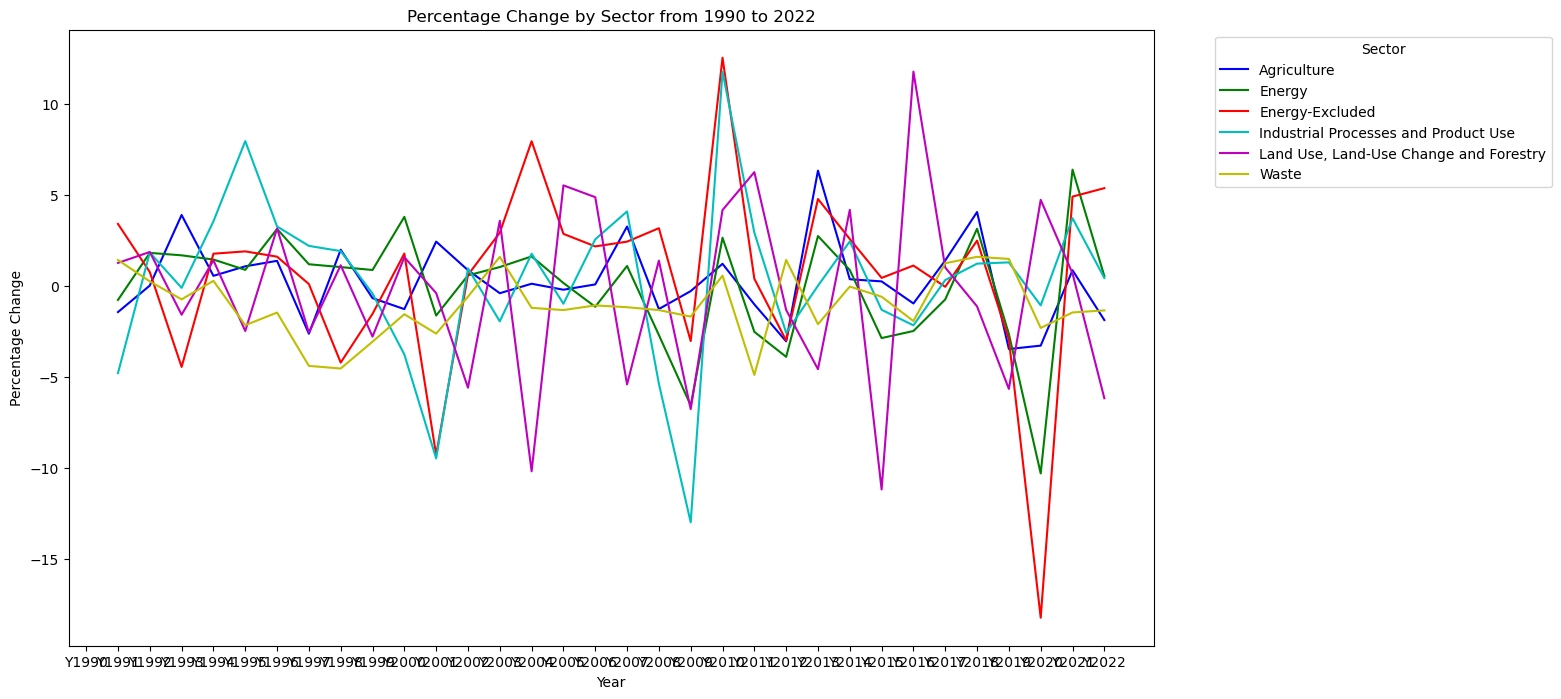

In [72]:
# Plotting sector_sum_diff data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum_diff.index, colors):
    ax.plot(time, sector_sum_diff.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change by Sector from 1990 to 2022')
ax.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Concentrations')

Text(0.5, 1.0, 'Concentrations by Sector and GHG Category from 1990 to 2022')

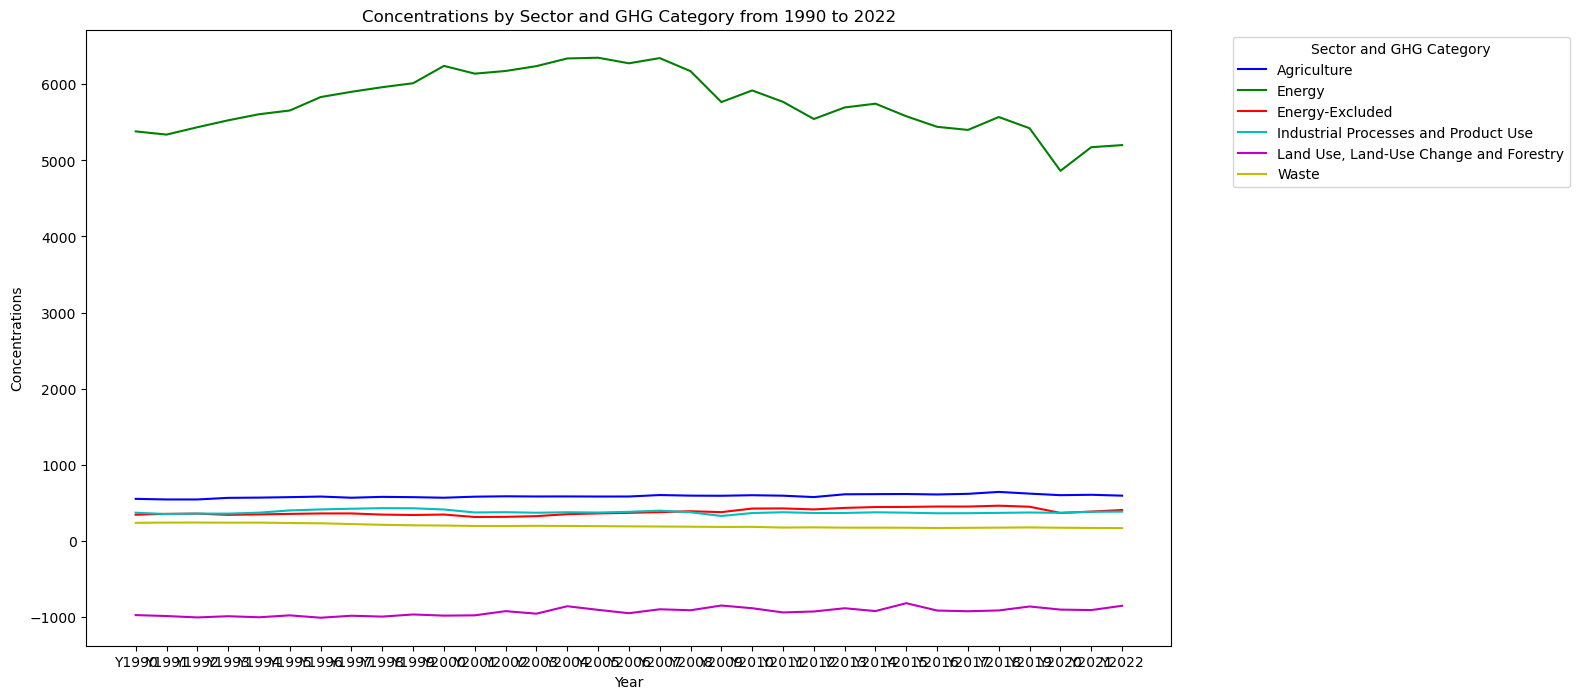

In [65]:

# Plotting sector_sum data with 6 lines for each sector
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each sector
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each sector
for (sector), color in zip(sector_sum.index, colors):
    ax.plot(time, sector_sum.loc[sector], label=f'{sector}', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Concentrations')
ax.set_title('Concentrations by Sector and GHG Category from 1990 to 2022')
ax.legend(title='Sector and GHG Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()